Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset   
file uses semicolon (;) as separator

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Step 3: Basic Dataset Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Step 4: Probability that a User Responded (Converted)

We use the Response column.
P(Response)=  Users who responded
              ___________________
              Total users
	​


In [5]:
total_users = len(df)
responded_users = df["Response"].sum()

p_response = responded_users / total_users
p_response

np.float64(0.14910714285714285)

Create a “Clicked Campaign” Feature
If a user accepted any previous campaign → considered as clicked

In [6]:
campaign_cols = [
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5"
]

df["Clicked_Campaign"] = df[campaign_cols].sum(axis=1) > 0
df["Clicked_Campaign"] = df["Clicked_Campaign"].astype(int)

df[["Clicked_Campaign", "Response"]].head()

,Clicked_Campaign,Response
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


Step 6: Probability that User Clicked a Campaign
P(Click)= Users who clicked any campaign
          _______________________________
          Total users

In [7]:
clicked_users = df["Clicked_Campaign"].sum()

p_click = clicked_users / total_users
p_click

np.float64(0.20669642857142856)

Step 7: Conditional Probability
Probability of Response Given Click
P(Response∣Click)

In [8]:
clicked_df = df[df["Clicked_Campaign"] == 1]

p_response_given_click = clicked_df["Response"].mean()
p_response_given_click

np.float64(0.4060475161987041)

Step 8: Conditional Probability Table

In [9]:
conditional_table = pd.crosstab(
    df["Clicked_Campaign"],
    df["Response"],
    normalize="index"
)

conditional_table

Response,0,1
Clicked_Campaign,,
0,0.917839,0.082161
1,0.593952,0.406048


Step 9: Visualization – Click vs Response
📊 Bar Chart

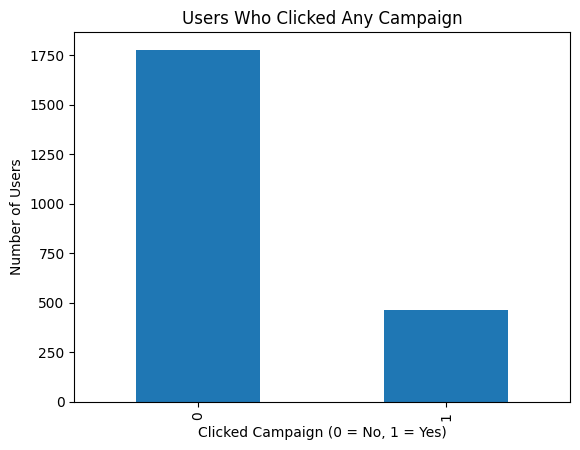

In [10]:
plt.figure()
df["Clicked_Campaign"].value_counts().plot(kind="bar")
plt.title("Users Who Clicked Any Campaign")
plt.xlabel("Clicked Campaign (0 = No, 1 = Yes)")
plt.ylabel("Number of Users")
plt.show()

Step 10: Visualization – Response Distribution

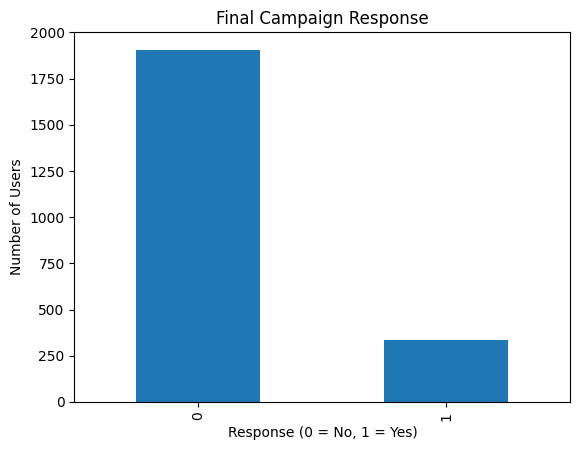

In [11]:
plt.figure()
df["Response"].value_counts().plot(kind="bar")
plt.title("Final Campaign Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Number of Users")
plt.show()

Step 11: Heatmap – Conditional Probability

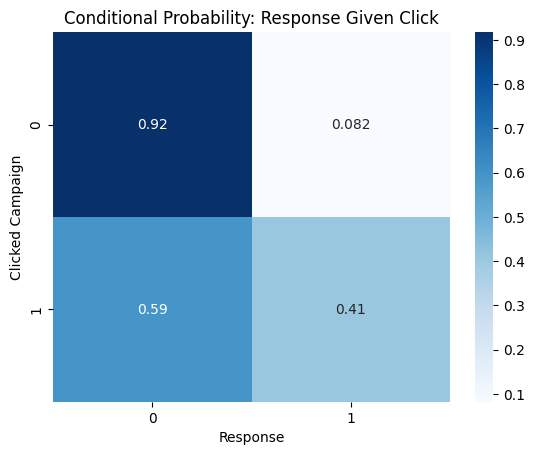

In [12]:
plt.figure()
sns.heatmap(conditional_table, annot=True, cmap="Blues")
plt.title("Conditional Probability: Response Given Click")
plt.xlabel("Response")
plt.ylabel("Clicked Campaign")
plt.show()